In [57]:
import pandas as pd
import numpy as np

# FILEPATH: /home/roland/Schreibtisch/Capstone/comparison/comp.ipynb
files = ['AngleMap', 'xi_yi_values','Res', 'Raw_ROIsMask', 'Raw_Tophat', 'Raw_Mask', 'Raw_BGSub']
python_files = []
matlab_files = []

for filename in files:
    filepath = f"{filename}.csv"
    filepath_mat = f"{filename}_mat.csv"
    tmp = pd.read_csv(filepath)
    tmp_mat = pd.read_csv(filepath_mat)
    python_files.append(tmp)
    matlab_files.append(tmp_mat)

# quantify differences between python and matlab files
differences = []
max_values = []
for python_df, matlab_df in zip(python_files, matlab_files):
    # Flatten the DataFrames into 1D arrays
    python_array = python_df.values.flatten()
    matlab_array = matlab_df.values.flatten()

    # Calculate the mean absolute difference
    mean_abs_diff = np.mean(np.abs(python_array - matlab_array))
    differences.append(mean_abs_diff)

    # Calculate the max value
    max_value = max(python_df.values.max(), matlab_df.values.max())
    max_values.append(max_value)

# Print the differences and max values
for filename, mean_abs_diff, max_value in zip(files, differences, max_values):
    print(f"For {filename}:")
    print(f"Mean absolute difference: {mean_abs_diff}")
    print(f"Max value: {max_value}\n")

For AngleMap:
Mean absolute difference: 0.1534090909090909
Max value: 180.0

For xi_yi_values:
Mean absolute difference: 11.49074733836404
Max value: 869.77638454924

For Res:
Mean absolute difference: 2.4894704949224484e-07
Max value: 114.559493091515

For Raw_ROIsMask:
Mean absolute difference: 0.000946969696969697
Max value: 1.0

For Raw_Tophat:
Mean absolute difference: 11.681450500965163
Max value: 3445

For Raw_Mask:
Mean absolute difference: 0.0017250360020835249
Max value: 1.0

For Raw_BGSub:
Mean absolute difference: 4.1303520544167664
Max value: 3981



In [58]:
difference = matlab_files[0] - python_files[0]
difference
print(matlab_files[0].isna().any().any())
print(python_files[0].isna().any().any())
print(matlab_files[0].columns.equals(python_files[0].columns))
print(matlab_files[0].index.equals(python_files[0].index))
python_files[0].shape


False
False
False
True


(32, 33)

In [69]:
import os
# do ls to get all files in directory
# Get the current directory
directory = os.getcwd()

# List all files in the directory
files = os.listdir(directory)

# Print the list of files
for file in files:
    print(file)



Raw_BGSub.csv
Raw_ROIsMask_mat.csv
RawRSize.png
res_py.csv
anglemap_global.csv
AngleMap_mat.csv
anglemap.csv
res_mat.csv
RawRSize.csv
xy_xcorr_mat.csv
MaskRSize.png
Res.csv
Raw_Mask.csv
raw.csv
AngleMap.csv
subplot.pdf
sd_plot.png
Raw_Mask_mat.csv
rot.csv
rot_1.csv
Raw_Tophat_mat.csv
Res_mat.csv
xi_yi_values.csv
angle_roi_0.csv
MaskRSize_mat.csv
AngleMap_1.csv
res_1.csv
comp.ipynb
xi_yi_values_mat.csv
subplot_mat.pdf
angle_roi_1.csv
clean_border.png
anglemap_accum.csv
rot_after.csv
hope.csv
Raw_ROIsMask.csv
res.csv
Res_1.csv
xy.csv
xi_yi_values_1.csv
Raw_BGSub_mat.csv
MaskRSize.csv
RawRSize_mat.csv
Raw_Tophat.csv


In [60]:
from spectrum.correlation import xcorr
xy = pd.read_csv('xy.csv', header=None)
mat_corr = pd.read_csv('xy_xcorr_mat.csv', header=None)
py_corr,_ = xcorr(xy[0], xy[1],  norm='unbiased')
py_corr = pd.DataFrame(py_corr)
mean_abs_diff = np.mean(np.abs(py_corr-mat_corr))
mean_abs_diff

2.560096188643175e-12

In [70]:
anglemap0 = pd.read_csv('angle_roi_1.csv', header=None).to_numpy()
anglemap = anglemap0[anglemap0 != 0]
anglemap_1d = anglemap.flatten()
anglemap_1d = anglemap_1d[anglemap_1d != 0]
anglemap_1d


array([ 29.,  30.,  30.,  30.,  30.,  46.,  30.,  30.,  30.,  30., 103.,
        25.,  26.,  28.,  30., 117., 148.,   4.,  17.,  24.,  33., 121.,
       140., 160., 175.,   9.,  27., 123., 140., 153., 161., 167.,  51.,
       123., 139., 150., 155., 158., 157., 131., 125., 138., 148., 153.,
       154., 150., 134., 106., 125., 137., 146., 150., 151., 147., 133.,
       113., 126., 137., 145., 149., 149., 144., 133., 117., 128., 138.,
       146., 149., 149., 145., 136., 123., 112., 132., 141., 148., 152.,
       151., 148., 141., 131., 120., 137., 145., 151., 154., 154., 151.,
       147., 139., 130., 121., 142., 148., 153., 155., 155., 153., 150.,
       144., 136., 125., 145., 151., 155., 156., 156., 155., 152., 148.,
       140., 127., 116., 148., 153., 157., 157., 157., 156., 154., 151.,
       145., 128., 112., 151., 156., 159., 159., 158., 157., 156., 155.,
       154., 137., 105., 155., 159., 161., 161., 159., 158., 159., 159.,
       160., 156., 113.,  99., 163., 164., 163., 16

In [73]:
import numpy as np
from sklearn.cluster import KMeans

# Your data
data = anglemap.flatten().reshape(-1, 1)  # Flatten the 2D array

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # start range from 2
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Calculate the coordinates of the line connecting the first and last points
x1, y1 = 2, wcss[0]  # start from 2
x2, y2 = 10, wcss[-1]
distances = []
for i in range(len(wcss)):
    x0 = i+1  # start from 2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)

# The optimal number of clusters is the one that corresponds to the maximum distance
optimal_clusters = distances.index(max(distances)) + 1  # +2 because range starts at 2
print('Optimal number of clusters:', optimal_clusters)

Optimal number of clusters: 2


In [90]:
from collections import Counter

# Run KMeans with the optimal number of clusters
optimal_clusters = 2  # replace this with your estimated number of clusters
# Fit the KMeans algorithm to the data
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

# Count the number of elements in each cluster
cluster_counts = Counter(kmeans.labels_)

# Calculate the total number of data points
total_data_points = len(data)

# Iterate over the clusters
for cluster in cluster_counts:
    # Get the data points in the cluster
    cluster_data = data[kmeans.labels_ == cluster]
    
    # Calculate the mean of the data points in the cluster
    cluster_mean = np.mean(cluster_data)
    
    # Calculate the minimum and maximum of the data points in the cluster
    cluster_min = np.min(cluster_data)
    cluster_max = np.max(cluster_data)
    
    # Calculate the difference between the maximum and minimum
    cluster_diff = cluster_max - cluster_min
    
    # Calculate the percentage of data points in the cluster
    cluster_percentage = (cluster_counts[cluster] / total_data_points) * 100
    
    print('Cluster:', cluster)
    print('Mean:', cluster_mean)
    print('Min:', cluster_min)
    print('Max:', cluster_max)
    print('Difference between max and min:', cluster_diff)
    print('Percentage:', cluster_percentage, '%\n')

Cluster: 1
Mean: 28.047619047619047
Min: 4.0
Max: 51.0
Difference between max and min: 47.0
Percentage: 11.864406779661017 %

Cluster: 0
Mean: 146.32692307692307
Min: 99.0
Max: 175.0
Difference between max and min: 76.0
Percentage: 88.13559322033898 %



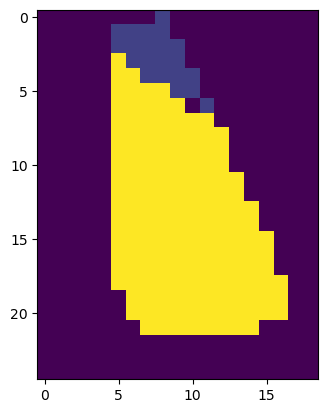

In [91]:
from matplotlib import pyplot as plt
# Create an empty array for the mean values
mean_values = np.zeros_like(anglemap_1d)

# For each cluster, calculate the mean value and assign it to the corresponding elements in the mean_values array
for i in range(optimal_clusters):
    mean_values[kmeans.labels_ == i] = np.mean(data[kmeans.labels_ == i])

# Reshape the mean_values array to the original shape of the data
mean_values = mean_values.reshape(anglemap.shape)
anglemap_global = anglemap0.copy()
anglemap_global[anglemap_global != 0] = mean_values
anglemap_global
np.savetxt('anglemap_global.csv', anglemap_global, delimiter=',', fmt='%d')
plt.imshow(anglemap_global)

In [66]:
import re
